In [1]:
#imports
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# Load the dataset
file = r'C:\Users\Michele\Documents\GitHub\project_4_group_7\data\cleaned_mortality_data.csv'
df = pd.read_csv(file)

In [3]:
# Select relevant features for anomaly detection
features = ["crude_rate", "deaths", "prescriptions_dispensed_by_us_retailers_in_that_year_(millions)"]
X = df[features]

# Handle missing values by filling with median values
X = X.fillna(X.median())

In [4]:
# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["anomaly"] = model.fit_predict(X)  # -1 indicates anomaly, 1 is normal

In [5]:
# Count anomalies
num_anomalies = (df["anomaly"] == -1).sum()

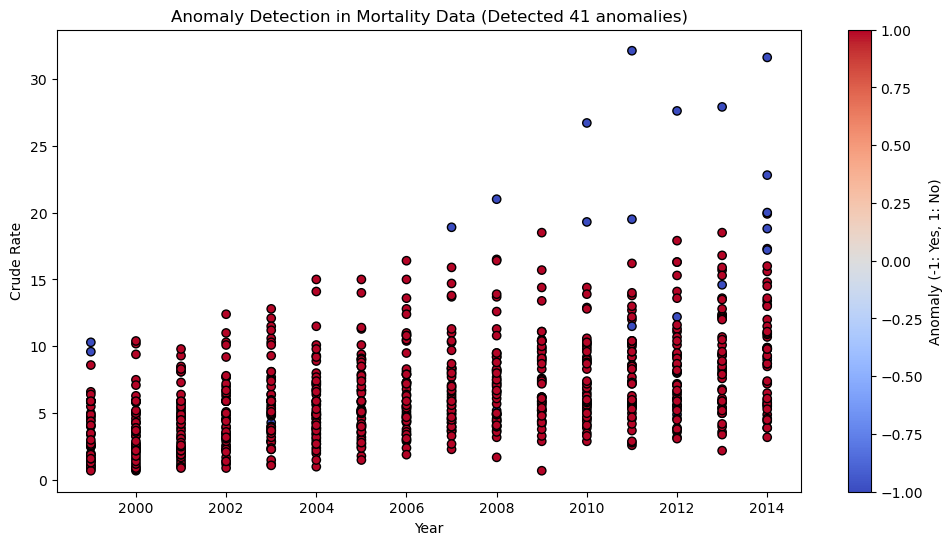

In [6]:
# Visualize anomalies in crude rate
plt.figure(figsize=(12, 6))
plt.scatter(df["year"], df["crude_rate"], c=df["anomaly"], cmap="coolwarm", edgecolors="k")
plt.xlabel("Year")
plt.ylabel("Crude Rate")
plt.title(f"Anomaly Detection in Mortality Data (Detected {num_anomalies} anomalies)")
plt.colorbar(label="Anomaly (-1: Yes, 1: No)")
plt.show()

In [7]:
# Show first few detected anomalies
df[df["anomaly"] == -1].head()

,state,year,deaths,population,crude_rate,crude_rate_lower_95%_confidence_interval,crude_rate_upper_95%_confidence_interval,prescriptions_dispensed_by_us_retailers_in_that_year_(millions),anomaly
64,California,1999,1598.0,33499204,4.8,4.5,5.0,116,-1
65,California,2000,1105.0,33871648,3.3,3.1,3.5,126,-1
67,California,2002,1583.0,34871843,4.5,4.3,4.8,142,-1
68,California,2003,1530.0,35253159,4.3,4.1,4.6,149,-1
69,California,2004,1547.0,35574576,4.3,4.1,4.6,155,-1


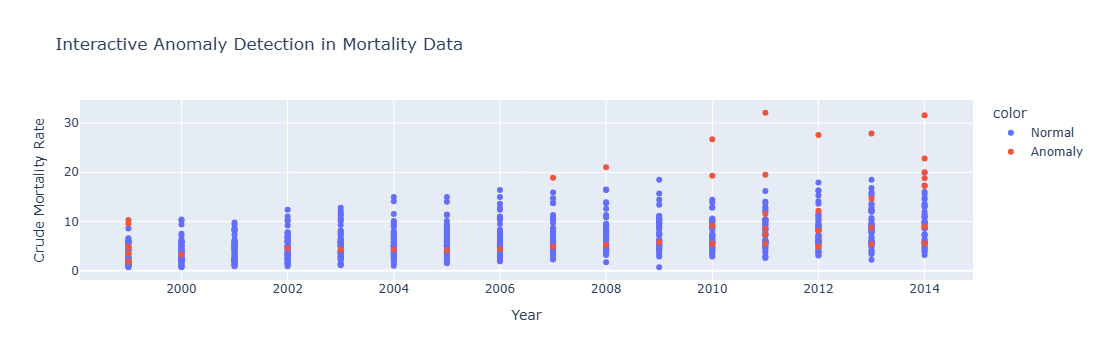

In [9]:
# interactive scatter plot with Plotly
fig = px.scatter(
    df, 
    x="year", 
    y="crude_rate", 
    color=df["anomaly"].map({1: "Normal", -1: "Anomaly"}), 
    hover_data=["state", "deaths", "prescriptions_dispensed_by_us_retailers_in_that_year_(millions)"],
    title="Interactive Anomaly Detection in Mortality Data",
    labels={"crude_rate": "Crude Mortality Rate", "year": "Year"},
)

# Show the plot
fig.show()